In [ ]:
#출처 : https://lhh3520.tistory.com/375?category=839963

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
# 데이터 다운로드
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels)=mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 로드된 데이터 확인
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


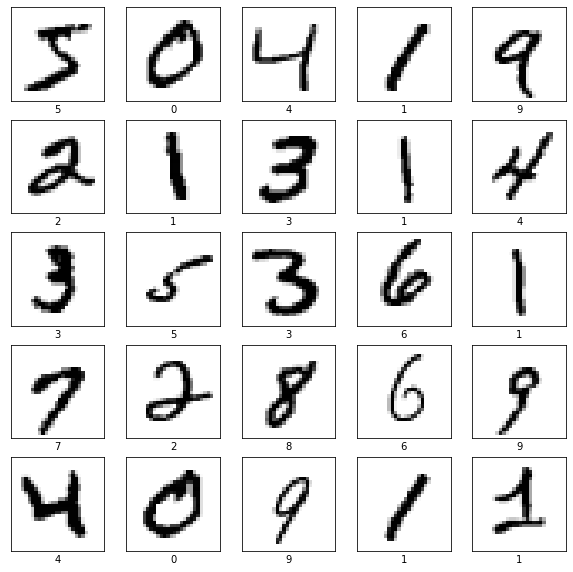

In [ ]:
# 데이터 확인 시각화
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# 데이터 전처리 : 픽셀 컬러 정보가 255개라서 나누기(데이터 정규화)
train_images = train_images.astype('float32')
train_images = train_images / 255

test_images = test_images.astype('float32')
test_images = test_images / 255

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# 모델 구성
model = keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation=tf.nn.relu),
    Dropout(0.1),
    Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2755 - accuracy: 0.9199
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1252 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0903 - accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0724 - accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0484 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9862
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0368 - accuracy: 0.9881
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9890
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.030

In [ ]:
# 훈련이 잘 되었는지 테스트
loss, accuracy = model.evaluate(test_images, test_labels)
print("Loss : {}, Acc : {}".format(loss,accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9815
Loss : 0.0687190592288971, Acc : 0.9815000295639038


In [ ]:
predict_test=test_images[10]
predict_test.shape

model.predict(predict_test)
# 모델의 입력값은 3차원 배열 필요, 실제 입력값은 2차원 배열

ValueError: ignored

In [ ]:
# 테스트용 데이터에 차원을 더해서 차원 맞추기
predict_test = np.expand_dims(predict_test,0)
predict_test.shape

(1, 28, 28)

ERROR! Session/line number was not unique in database. History logging moved to new session 142


In [ ]:
# 재예측
result = model.predict(predict_test)
np.argmax(result)

0

In [ ]:
test_labels[10]

0

<function matplotlib.pyplot.show(close=None, block=None)>

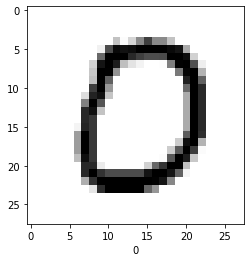

In [ ]:
# 이미지로 결과 시각화
plt.figure()
plt.imshow(test_images[10],cmap=plt.cm.binary)
plt.xlabel(test_labels[10])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

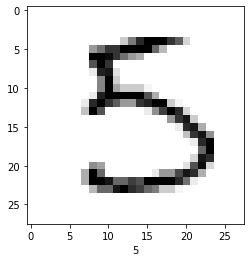

In [ ]:
plt.figure()
plt.imshow(test_images[15],cmap=plt.cm.binary)
plt.xlabel(test_labels[15])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

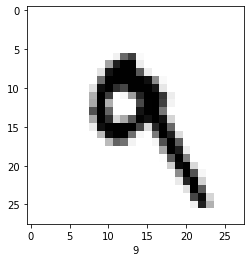

In [ ]:
plt.figure()
plt.imshow(test_images[7],cmap=plt.cm.binary)
plt.xlabel(test_labels[7])
plt.show

In [ ]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()